In [1]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [29]:
# 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
dataset= dataset.drop('Unnamed: 0', axis = 1)
dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [32]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [34]:
dataset.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


년도에 한자리 혹은 두자리가 있는것이 확인됨.

찾아본 결과 앞의 두 자리 누락

In [35]:
# 자릿수 누락 년도 전처리

Year =[]
for i in dataset['Year']:
  if i <= 20:
    Year.append(2000 + i)
  elif i <= 99:
    Year.append(1900 + i)
  else:
    Year.append(i)

Year

[2008.0,
 2009.0,
 2010.0,
 2010.0,
 2010.0,
 2005.0,
 2011.0,
 2005.0,
 2007.0,
 2011.0,
 2001.0,
 2003.0,
 2008.0,
 2005.0,
 2006.0,
 2009.0,
 2003.0,
 2014.0,
 2015.0,
 2009.0,
 2002.0,
 1997.0,
 2005.0,
 2014.0,
 2013.0,
 2002.0,
 1996.0,
 2011.0,
 2004.0,
 2000.0,
 2011.0,
 nan,
 2006.0,
 2015.0,
 2004.0,
 2009.0,
 2005.0,
 1984.0,
 2008.0,
 2006.0,
 2000.0,
 2004.0,
 2007.0,
 2008.0,
 2013.0,
 2015.0,
 1998.0,
 2002.0,
 2008.0,
 2009.0,
 2005.0,
 2009.0,
 2001.0,
 2009.0,
 2009.0,
 2010.0,
 2016.0,
 2010.0,
 2010.0,
 1985.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2004.0,
 1998.0,
 2011.0,
 2004.0,
 2014.0,
 2010.0,
 1999.0,
 2007.0,
 2015.0,
 2003.0,
 2009.0,
 2010.0,
 1985.0,
 2000.0,
 2007.0,
 2008.0,
 2005.0,
 1997.0,
 1997.0,
 2003.0,
 2000.0,
 2003.0,
 1995.0,
 2005.0,
 2010.0,
 1999.0,
 2010.0,
 2005.0,
 2011.0,
 2014.0,
 2003.0,
 1998.0,
 2011.0,
 2001.0,
 2010.0,
 1993.0,
 2014.0,
 2009.0,
 2002.0,
 2004.0,
 2005.0,
 2007.0,
 2005.0,
 2000.0,
 2016.0,
 nan,
 2012.0,
 2007.0

In [37]:
dataset['Year'] = pd.Series(Year)
dataset['Year']

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [38]:
# 변경전 Year의 통계수치와 차이를 확인해 볼 수 있다.
dataset.describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [39]:
# Year를 Genre와 Publisher의 조합으로 추론하기
Year_calculate = dataset[['Year','Genre','Publisher']].groupby(['Genre','Publisher']).mean()
Year_calculate

Year
Genre    Publisher                                          
Action   20th Century Fox Video Games            1981.500000
         3DO                                     1999.823529
         505 Games                               2009.952381
         5pb                                     2013.800000
         989 Studios                             1998.500000
...                                                      ...
Strategy Vivendi Games                           2002.916667
         Warner Bros. Interactive Entertainment  2010.000000
         Westwood Studios                        1999.000000
         Zoo Digital Publishing                  2008.000000
         Zushi Games                             2008.000000

[1822 rows x 1 columns]

Year의 결측값을 해결하기위해 쓰는 두개의 컬럼(Genre와 Publisher)을 먼저 전처리해주어야 한다.

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

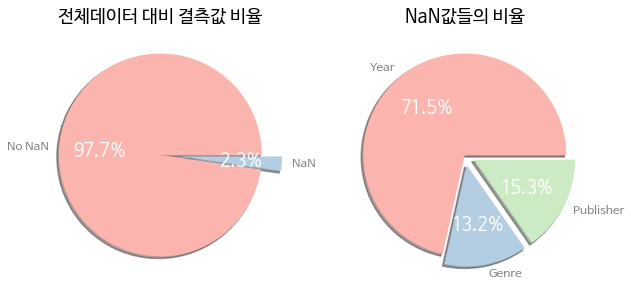

In [41]:
sns.set_context('talk')
sns.set_palette('Pastel1')

fig, ax = plt.subplots(1,2,figsize =(10,5))


sizes1 = [16219/16598, 379/16598]
labels1 = ['No NaN','NaN']


pathes, texts, autotexts = ax[0].pie(sizes1,
                                   labels = labels1,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.2))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[0].set_title('전체데이터 대비 결측값 비율')




sizes2 = [271/379, 50/379, 58/379]
labels2 = ['Year','Genre', 'Publisher']

pathes, texts, autotexts = ax[1].pie(sizes2,
                                   labels = labels2,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.1,0.1))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[1].set_title('NaN값들의 비율')

plt.show()

NaN값을 비교해 봤더니 전체데이터 대비 NaN값이 2.3% 밖에 되지 않고, 극소수의 NaN값들 안에서도 "Genre"와 "Publisher"는  극히 일부이므로 NaN값을 처리하는데 있어서 drop을 해주는것이 좋다고 판단했다. 극히 일부의 NaN값을 위해 결측값처리의 방법론을 활용하여 넣어준다해도 오차가 생기는데 극히 일부의 데이터 결측처리를 위해서 오차를 내가면서 할 필요성을 느끼지 못하여 옳다고 생각한다.

반면 Year역시 전체데이터와 비교했을때 극히 일부의 데이터에 불과하지만 "Genre"와 "Publisher" 를 같이 비교했을땐 비중이 높다 하지만 앞에서 이 둘을 drop처리했기때문에 같이 drop처리를 해준다.

(아주 작은데이터 라도 무시할 수 없지만 극히 일부의 데이터를 위해 필요이상의 시간을 낭비하는것 또한 비효율이라고 생각했다.)

In [43]:
# Genre와 Publisher 두개의 feature에 빈값이 있는 행 제거
dataset = dataset.dropna(subset = ['Genre'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Publisher'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Year'], axis = 0, how = 'any')

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [45]:
dataset.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [49]:
dataset.iloc[:,5:].head(50)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


특정 국가별 출고량의 단위가 정리되어 있지않아 정리를 해줘야한다.